# **Project Name**    - Mobile price range prediction classification



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

There has been a lot of competition in the mobile phone industry, due to which nowadays the price of a mobile phone is determined by looking at many factors like RAM, Internal Memory, camera quality, battery power, screen size, and many more.

Due to this, we have been given a dataset in which all the factors of mobile phones have been named as different variables. Due to this, we have to conduct a study to understand the factors affecting the price range of mobile phones.


# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/Manoharjha333/Mobile-price-range-prediction-classification/blob/main/Mobile_price_range_prediction_classification.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

In the competitive mobile phone market companies want to understand the sales data of mobile phones and the factors which drive the prices. The objective is to find out some relation between the features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 642.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=515072 sha256=a8bba44cb0a533ee964e734d8b88b93ec7321697c1a756d806d94925a67f1ba8
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

### Dataset Loading

In [4]:
# Load Dataset
dataset = pd.read_csv(r'/content/drive/MyDrive/Mobile price range prediction classification/data_mobile_price_range.csv')

### Dataset First View

In [5]:
# Dataset First Look
dataset.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
dataset.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
dataset.shape

(2000, 21)

### Dataset Information

In [8]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

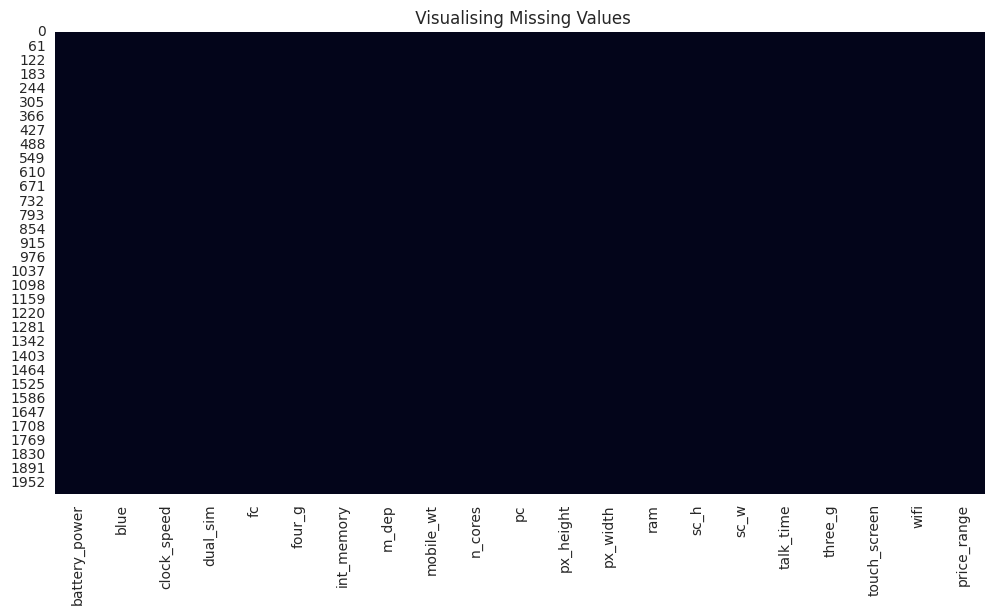

In [11]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(dataset.isnull(), cbar=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

Answer Here

This is a data set related to all types of features of mobile phones which contains 2000 rows and 21 columns. In which there are no duplicate values and no missing values.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns

dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
# Dataset Describe

dataset.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

Answer Here


**Battery power :** Battery capacity in mAh

**Blue :** Has bluetooth or not

**Clock speed :** speed at which microprocessor executes instructions


**Dual sim :** Has dual sim support or not


**Fc :** Front Camera megapixels


**Four_g :** Has 4G or not


**Int memory :** Internal memory capacity


**M.dep :** Mobile depth in cm


**Mobile_wt :** Weight of mobiles phone


**N_cores :** Number of cores in processor


**Pc :** Primary Camera mega pixels

**Px_height :** Pixel resolution height

**Px_width :** Pixel resolution width

**Ram :** Random Access Memory in MB

**Sc_h :** Screen Height



**SC_W :** Screen width



**Talk time :** Longest that a single battery can last over a call



**Three_g :** Has 3g or not




**Wifi :** Has wifi or not



**Price range :** This is the target variable with a value of O(low cost) 1 (medium cost), 2 (high cost) 3(very high cost)


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.

dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

# Create a copy of the current dataset and assigning to df
df=dataset.copy()

In [16]:
# Check value for battery power under 1000mAh
battery_power_under_1000 = df[df['battery_power'] < 1000]

count_battery_power_under_1000 = len(battery_power_under_1000)

print(f"Number of instances with Battery Power under 1000: {count_battery_power_under_1000}")

# Check value for battery power under 500mAh
battery_power_under_500 = df[df['battery_power'] < 500]

count_battery_power_under_500 = len(battery_power_under_500)

print(f"Number of instances with Battery Power under 500: {count_battery_power_under_500}")

# Check value for battery power above 1000mAh
battery_power_above_1000 = df[df['battery_power'] > 1000]

count_battery_power_above_1000 = len(battery_power_above_1000)

print(f"Number of instances with Battery Power above 1000: {count_battery_power_above_1000}")


Number of instances with Battery Power under 1000: 695
Number of instances with Battery Power under 500: 0
Number of instances with Battery Power above 1000: 1303


In [17]:
# how many has bluetooth or not
has_bluetooth = df[df['blue'] == 1]

not_bluetooth = df[df['blue'] == 0]


count_has_bluetooth = len(has_bluetooth)

count_not_bluetooth = len(not_bluetooth)


print(f"Number of instances with Bluetooth: {count_has_bluetooth}")

print(f"Number of instances without Bluetooth: {count_not_bluetooth}")



Number of instances with Bluetooth: 990
Number of instances without Bluetooth: 1010


In [18]:
# How many have dual SIM support or not?
has_dual_sim_support = df[df['dual_sim'] == 1]

has_not_dual_sim_support = df[df['dual_sim'] == 0]

count_has_dual_sim_support = len(has_dual_sim_support)

count_has_not_dual_sim_support = len(has_not_dual_sim_support)


print(f"Number of instances with Dual SIM support: {count_has_dual_sim_support}")

print(f"Number of instances without Dual SIM support: {count_has_not_dual_sim_support}")


Number of instances with Dual SIM support: 1019
Number of instances without Dual SIM support: 981


In [19]:
# Has 3g or not
has_3g = df[df['three_g'] == 1]

hasnot_3g = df[df['three_g'] == 0]

count_has_3g = len(has_3g)

count_hasnot_3g = len(hasnot_3g)

print(f"Number of instances with 3G support: {count_has_3g}")


print(f"Number of instances without 3G support: {count_hasnot_3g}")


Number of instances with 3G support: 1523
Number of instances without 3G support: 477


In [20]:
# Has 4g or not
has_4g = df[df['four_g'] == 1]


hasnot_4g = df[df['four_g'] == 0]


count_has_4g = len(has_4g)

count_hasnot_4g = len(hasnot_4g)


print(f"Number of instances with 4G support: {count_has_4g}")

print(f"Number of instances without 4G support: {count_hasnot_4g}")


Number of instances with 4G support: 1043
Number of instances without 4G support: 957


In [21]:
# Has touch_screen or not
has_touch_screen = df[df['touch_screen'] == 1]

hasnot_touch_screen = df[df['touch_screen'] == 0]


count_has_touch_screen = len(has_touch_screen)

count_hasnot_touch_screen = len(hasnot_touch_screen)


print(f"Number of instances with touch screen: {count_has_touch_screen}")
print(f"Number of instances without touch screen: {count_hasnot_touch_screen}")


Number of instances with touch screen: 1006
Number of instances without touch screen: 994


In [22]:
# how many instances in the dataset have Wi-Fi or Not
has_wifi = df[df['wifi'] == 1]
hasnot_wifi = df[df['wifi'] == 0]

count_has_wifi = len(has_wifi)
count_hasnot_wifi = len(hasnot_wifi)

print(f"Number of instances with Wi-Fi: {count_has_wifi}")
print(f"Number of instances without Wi-Fi: {count_hasnot_wifi}")


Number of instances with Wi-Fi: 1014
Number of instances without Wi-Fi: 986


In [23]:
# how many instances are in each price range category (0, 1, 2, 3)
price_range_counts = df['price_range'].value_counts()

print("Number of instances in each price range category:")
for category, count in price_range_counts.items():
    if category == 0:
        price_category = "Low Cost"
    elif category == 1:
        price_category = "Medium Cost"
    elif category == 2:
        price_category = "High Cost"
    elif category == 3:
        price_category = "Very High Cost"
    else:
        price_category = "Unknown"

    print(f"{price_category}: {count}")


Number of instances in each price range category:
Medium Cost: 500
High Cost: 500
Very High Cost: 500
Low Cost: 500


### What all manipulations have you done and insights you found?

Answer Here.

First I copied the data set with a different name. After that I checked the battery power to see how many mobiles have battery power less than 1000 and how many have more than 1000. In which I found that the number below 1000 is 695 and the number above 1000 is 1303.

After that I checked the number of mobiles having Bluetooth, Dual SIM, 3G support, 4G support, touch screen, Wi-Fi, and price range. in which I found that 990 mobiles have Bluetooth and 1010 do not have Bluetooth. The 1019 has dual SIM and the 981 does not. The 1523 supports 3g and the 477 does not. The 1043 supports 4g and the 957 doesn't. The 1006 has a touch screen and the 994 does not. 1014 has WiFi and 986 doesn't. Whereas the number of low cost mobiles is 500, the number of medium cost mobiles is 500, the number of high cost mobiles is 500 and the number of very high cost mobiles is 500.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Pie Chart on Dependant Variable

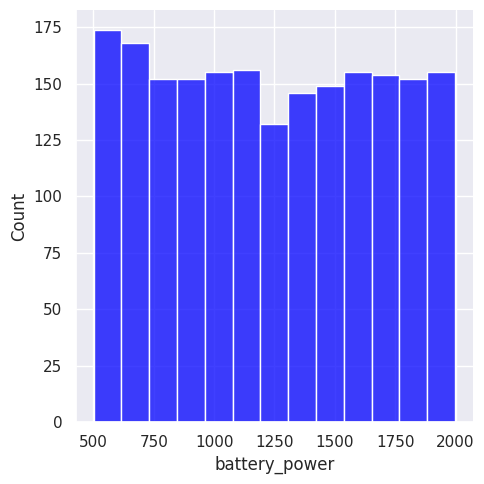

In [24]:
# Chart - 1 visualization code

sns.set(rc={'figure.figsize':(5,5)})
sns.displot(df["battery_power"], color='blue')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

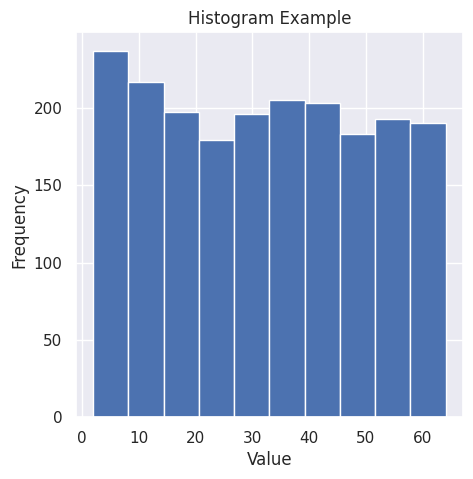

In [25]:
# Chart - 2 visualization code

plt.hist(df['int_memory'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

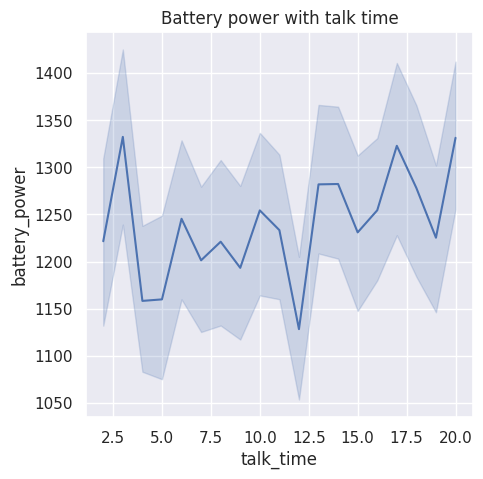

In [26]:
# Chart - 3 visualization code

categories = df['talk_time']
values = df['battery_power']

sns.lineplot(data=df, x=categories, y=values)
plt.title('Battery power with talk time')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

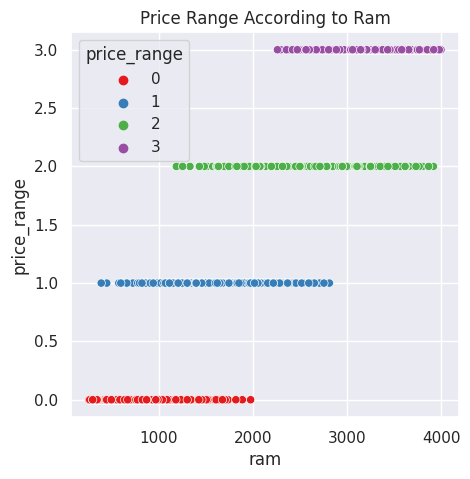

In [27]:
# Chart - 4 visualization code
X_variable = df['ram']
Y_variable = df['price_range']

sns.scatterplot(data=df, x=X_variable, y=Y_variable, hue=df['price_range'], palette='Set1')
plt.title('Price Range According to Ram')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

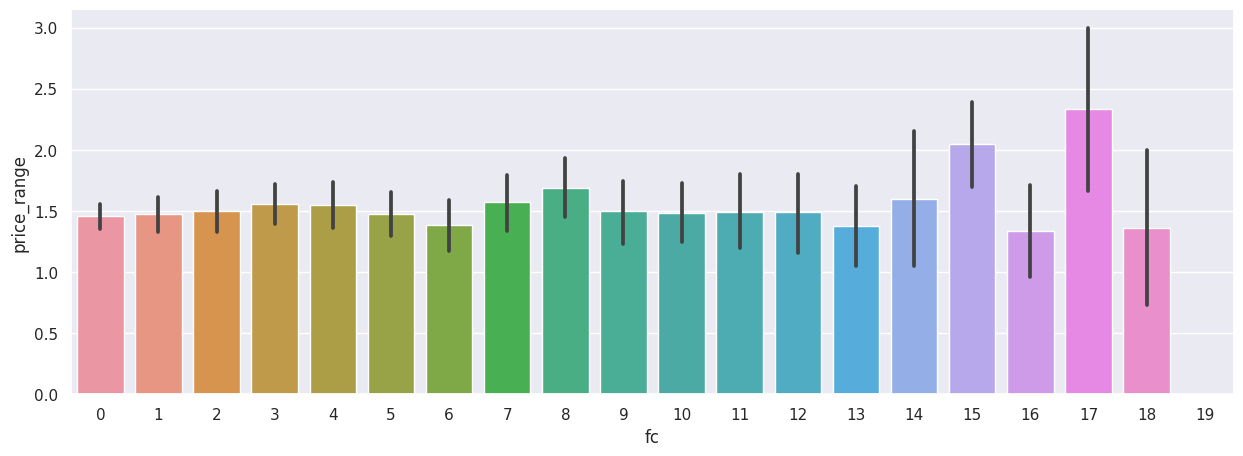

In [28]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(data=df, x='fc', y='price_range', ax=ax)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

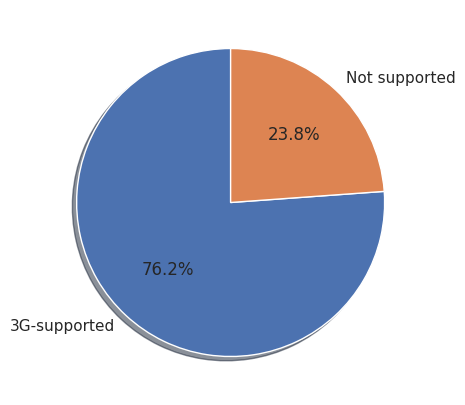

In [29]:
# Chart - 6 visualization code
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

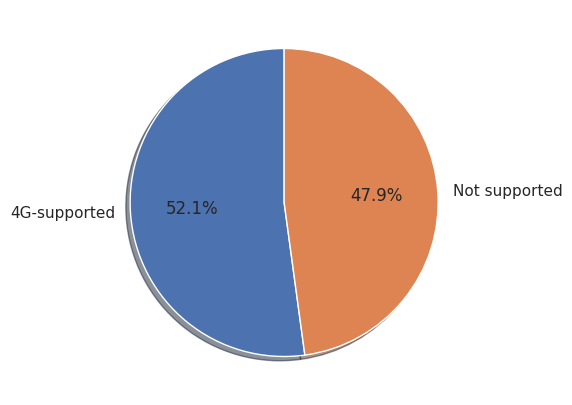

In [30]:
# Chart - 7 visualization code
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

Text(0.5, 0, 'MegaPixels')

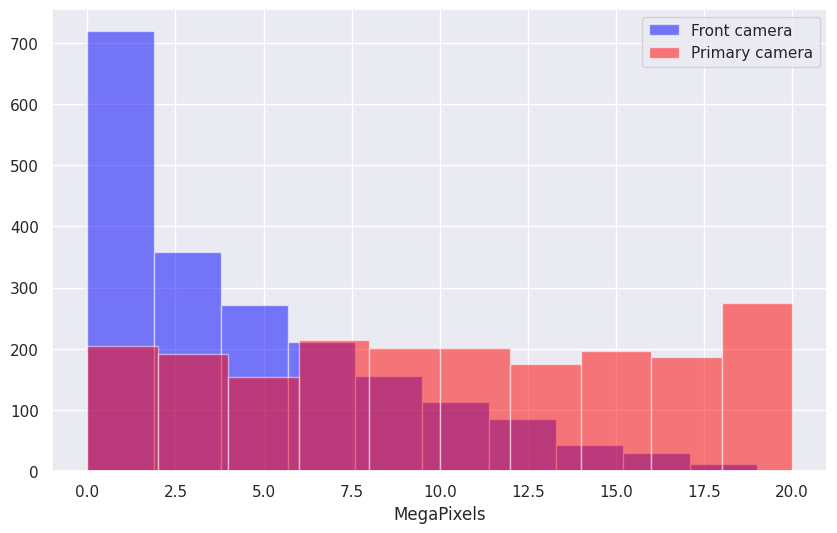

In [31]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

Text(0.5, 0, 'price range')

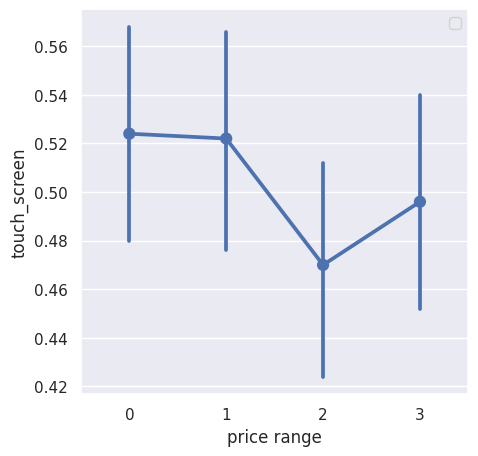

In [32]:
# Chart - 9 visualization code

sns.pointplot(y="touch_screen", x="price_range", data=df)
plt.legend()
plt.xlabel('price range')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

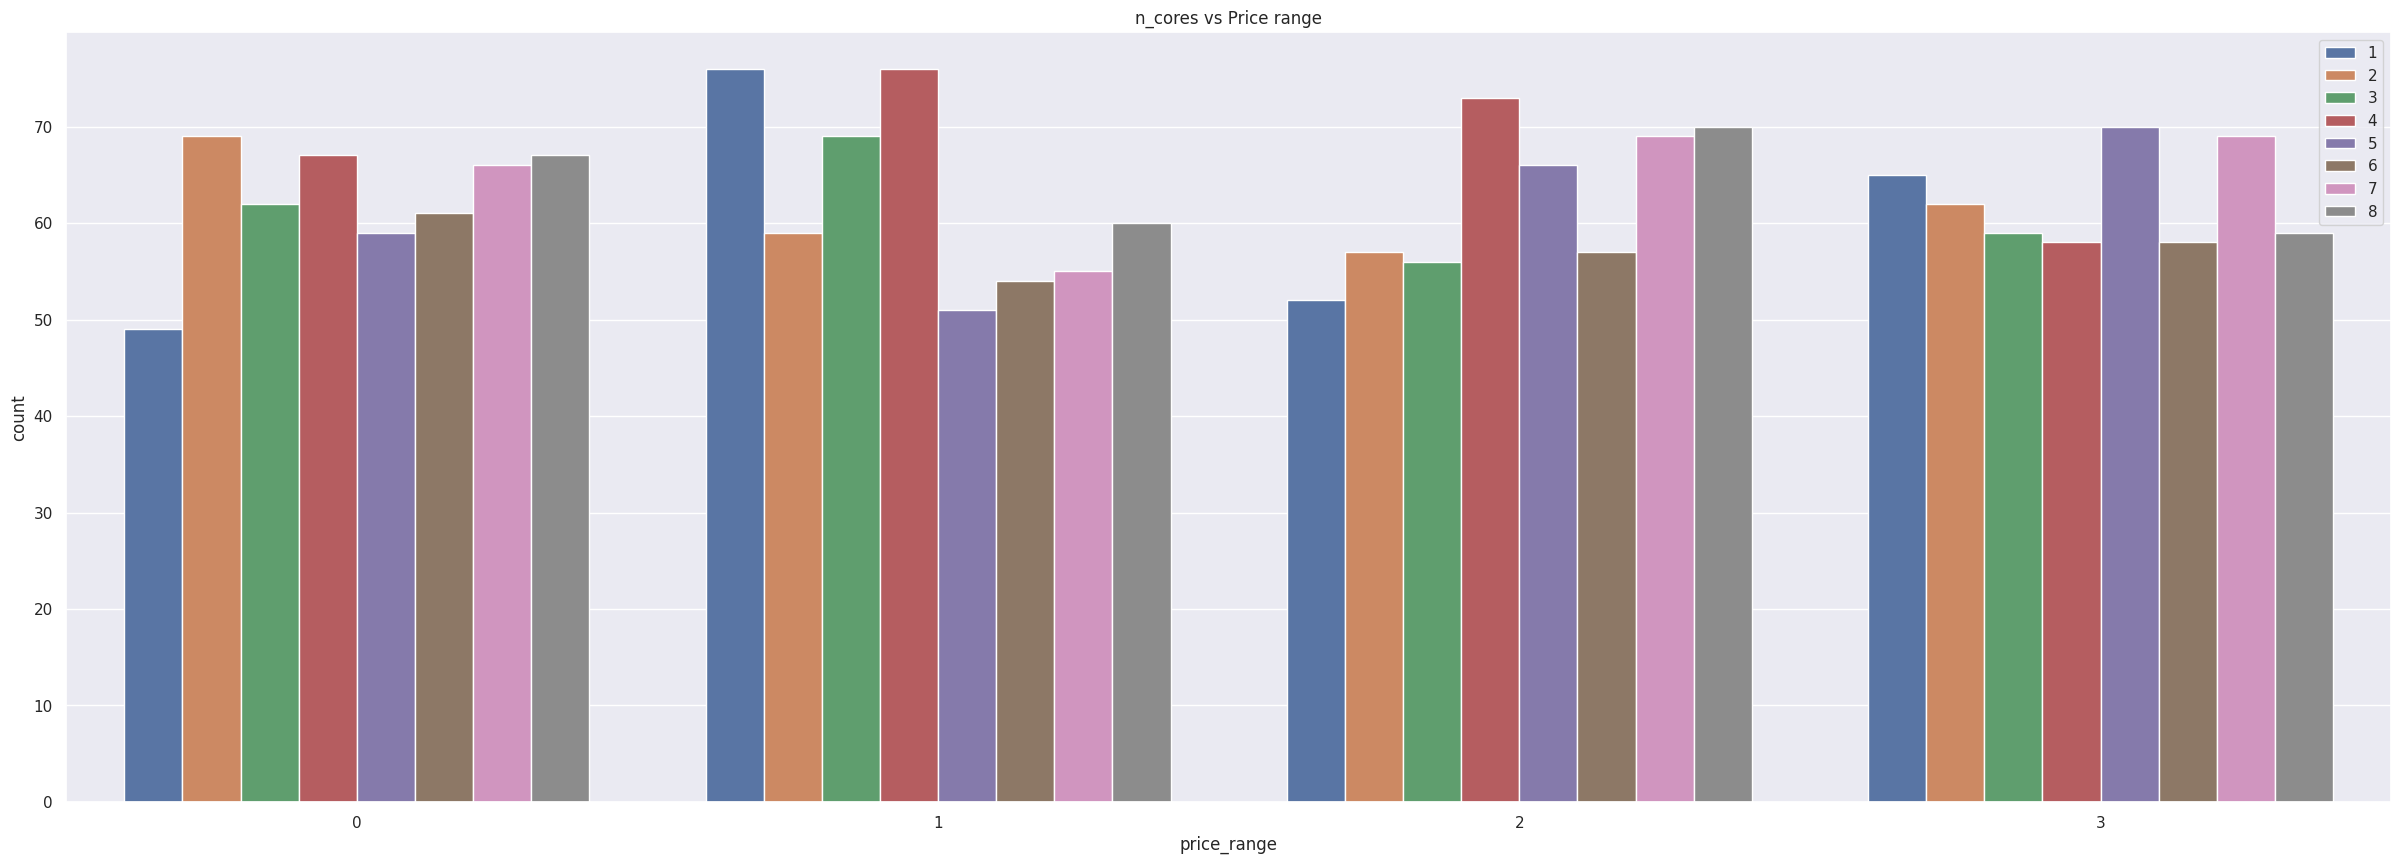

In [33]:
# Chart - 10 visualization code

plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='price_range', hue='n_cores')
plt.title("n_cores vs Price range")
plt.legend(loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Price range 0 has majority of phones with 2 core processors

Price range 1 has majority of phones with 1 and 4 core processors

Price range 2 has majority of phones with 4 core processors

Price range 3 has majority of phones with 5 and 7 core processors

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

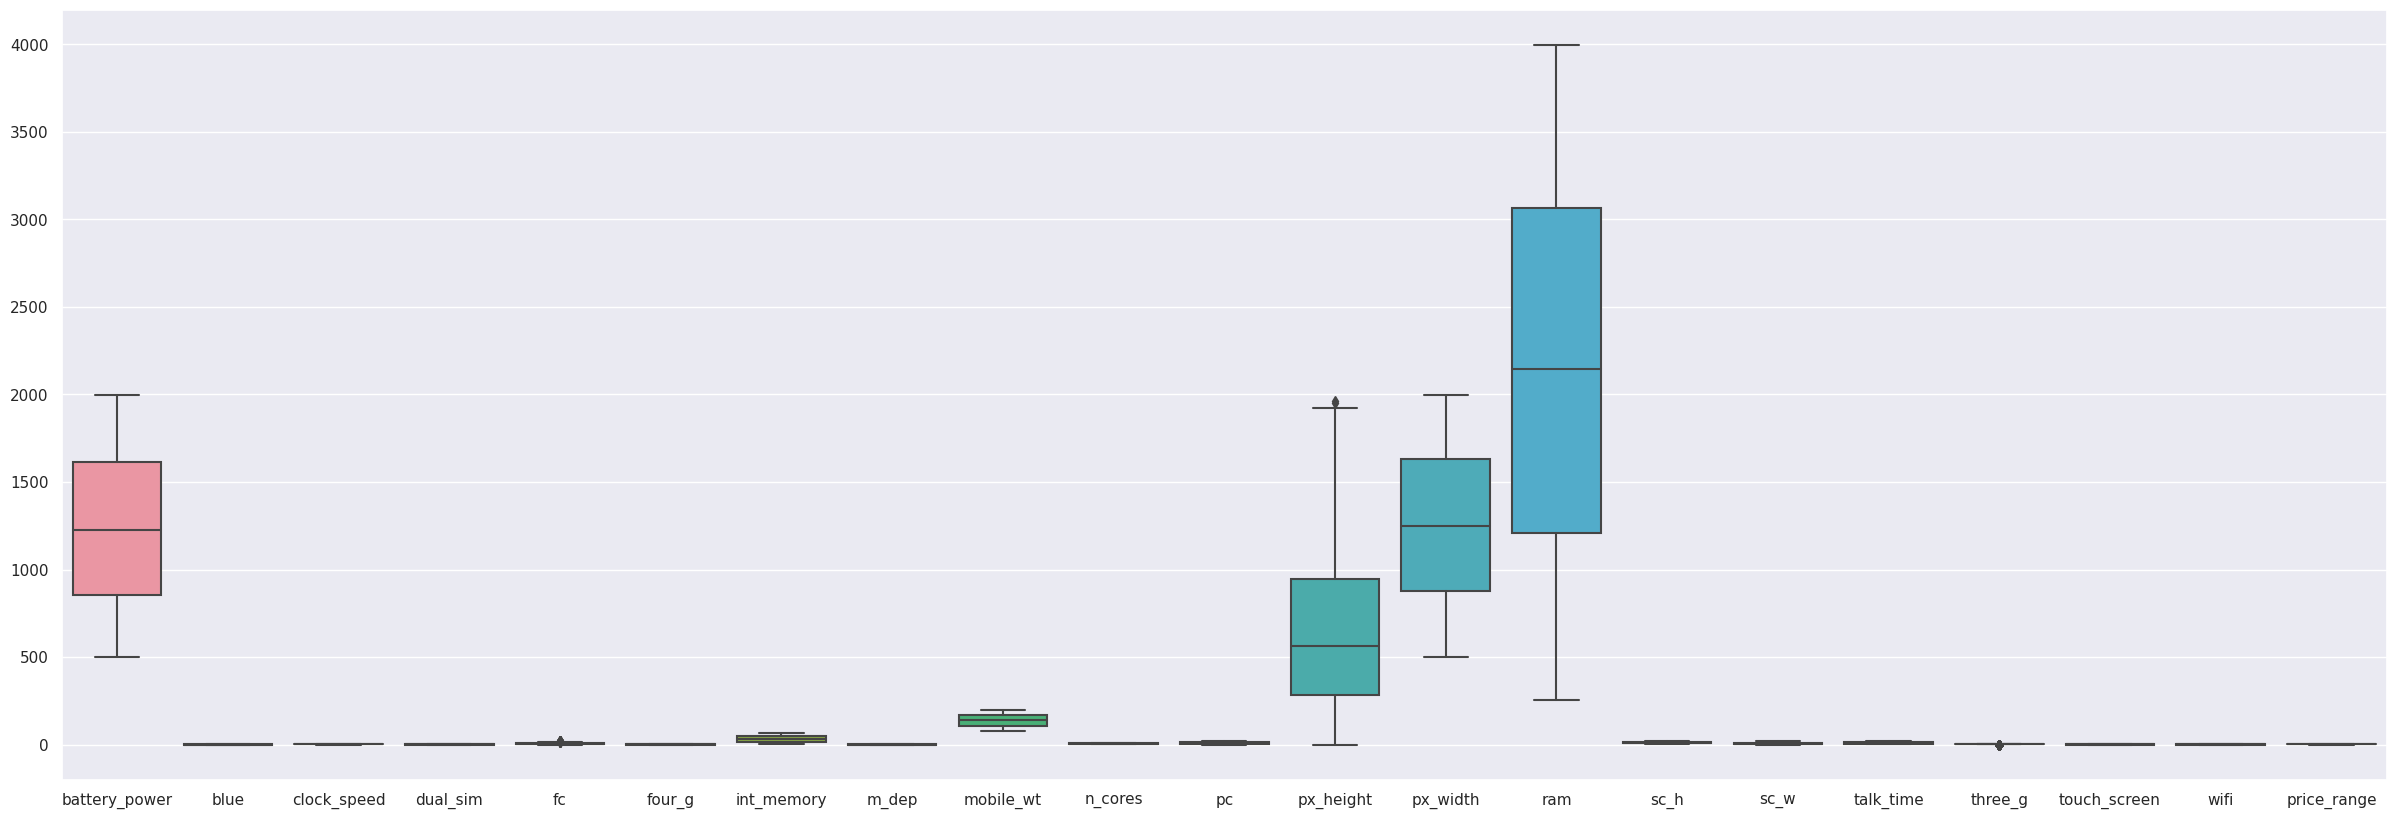

In [34]:
# Chart - 11 visualization code
fig, ax = plt.subplots(figsize=(30,10))

sns.boxplot(data=df, ax=ax)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

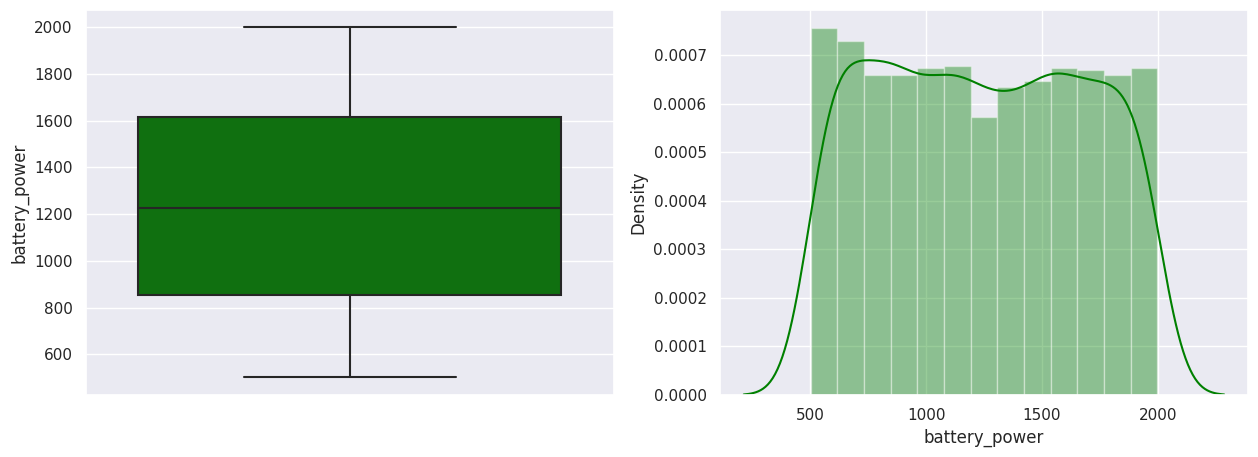

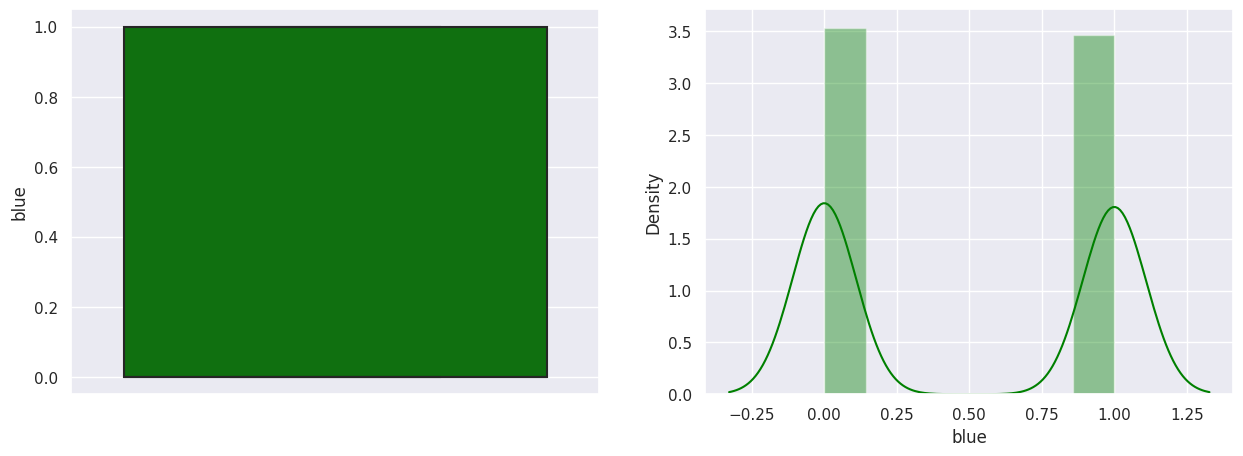

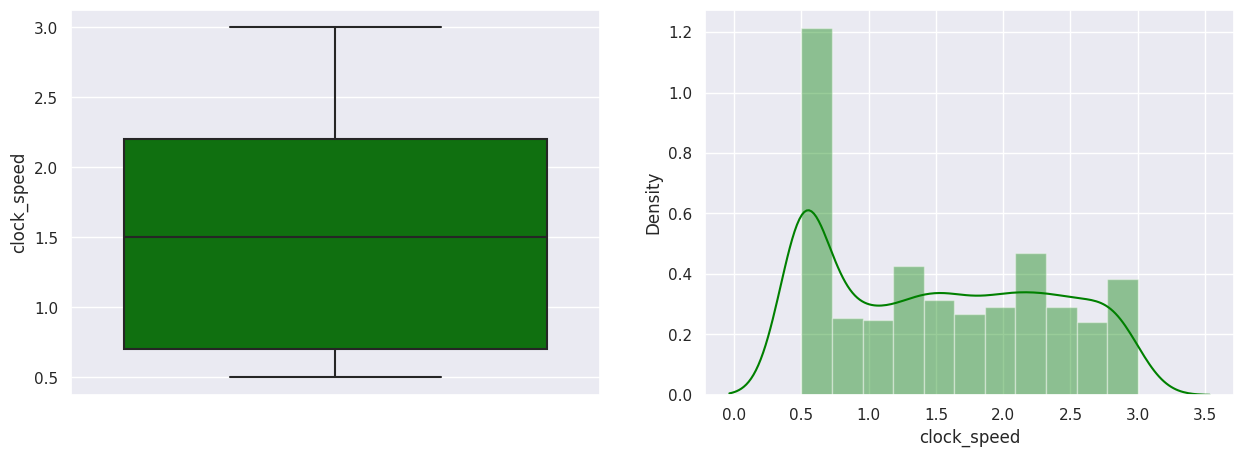

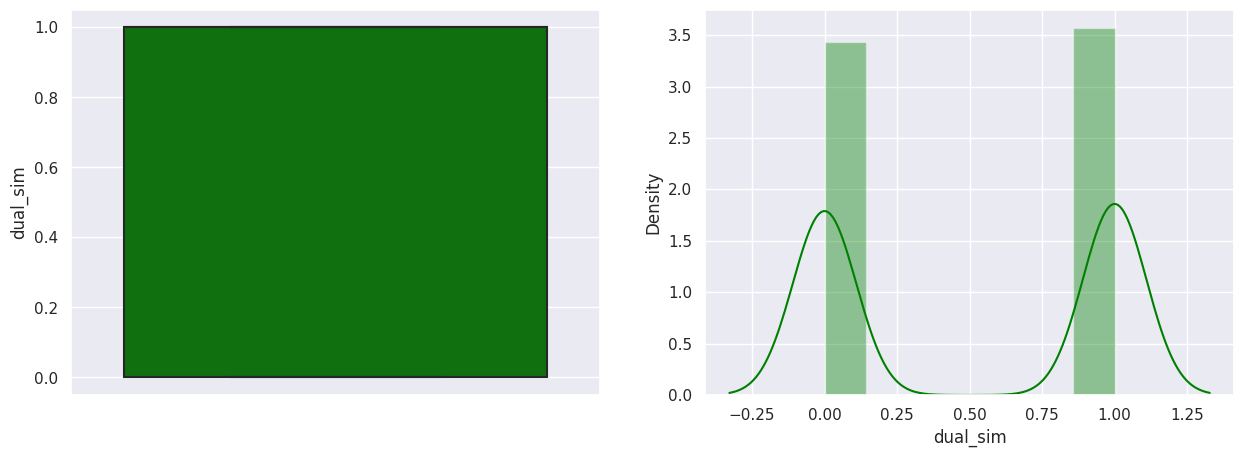

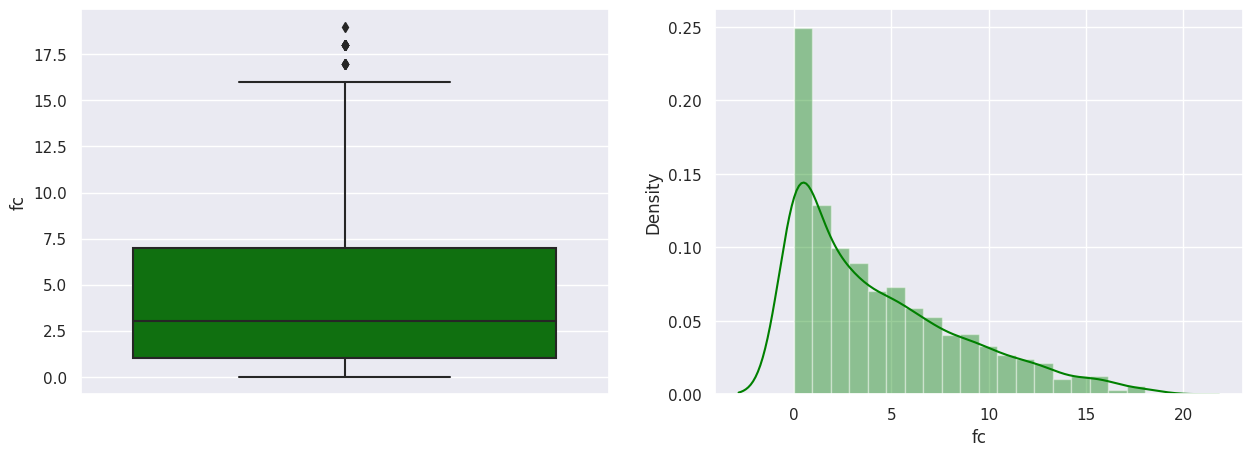

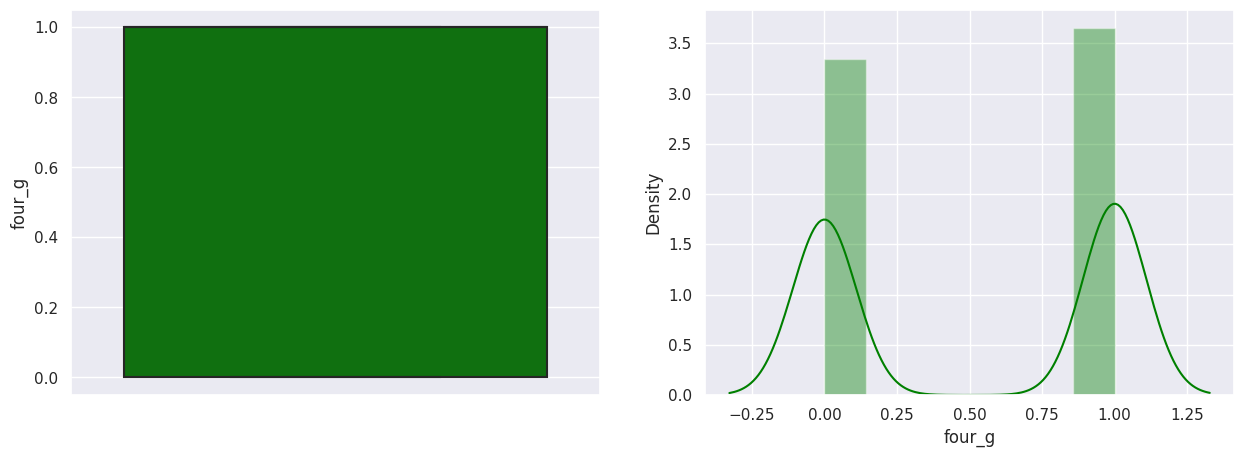

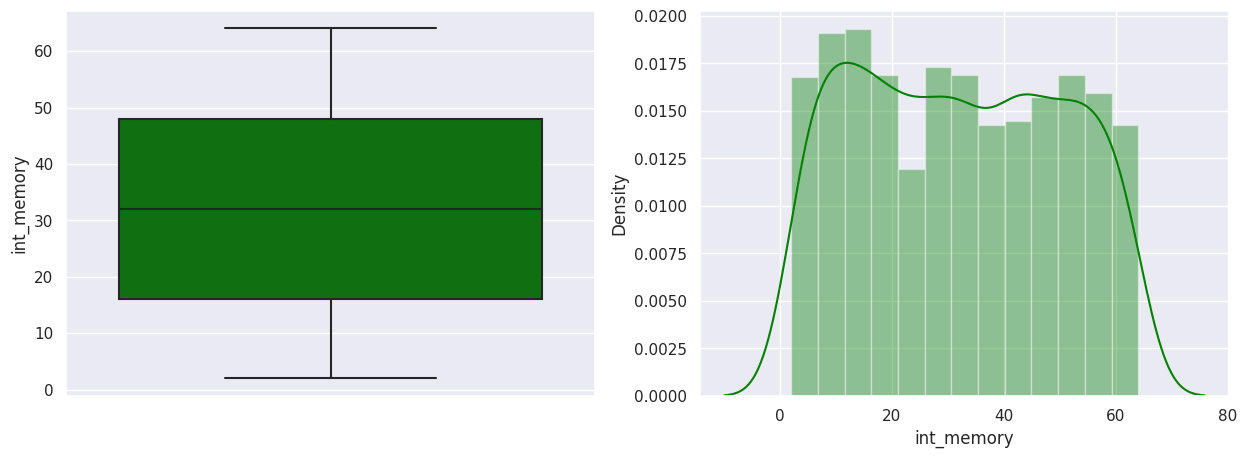

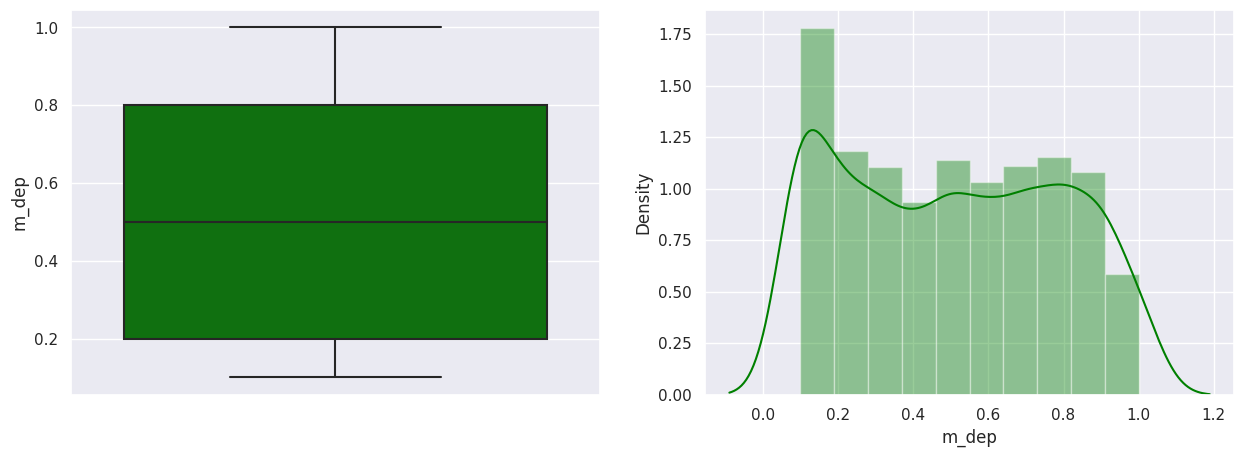

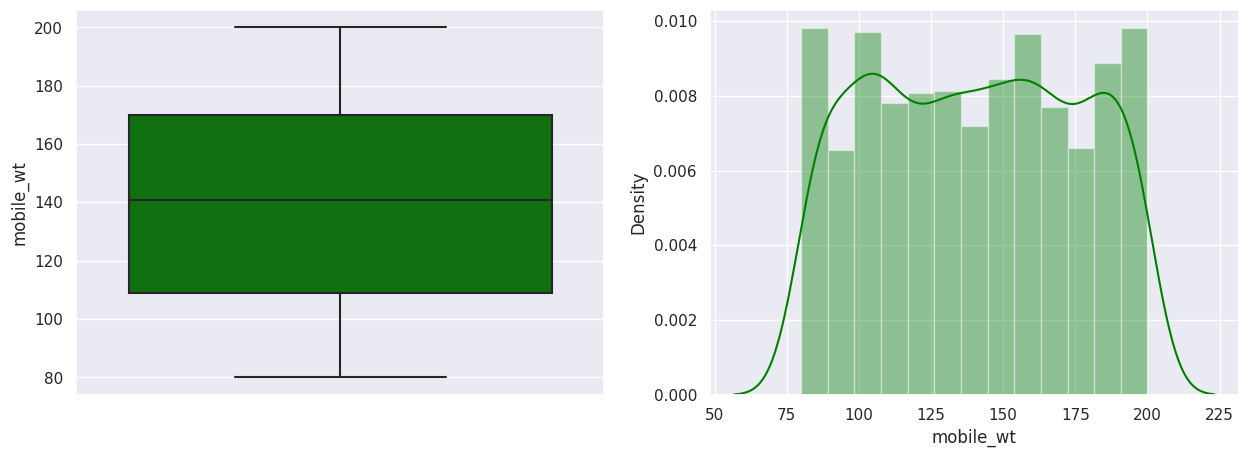

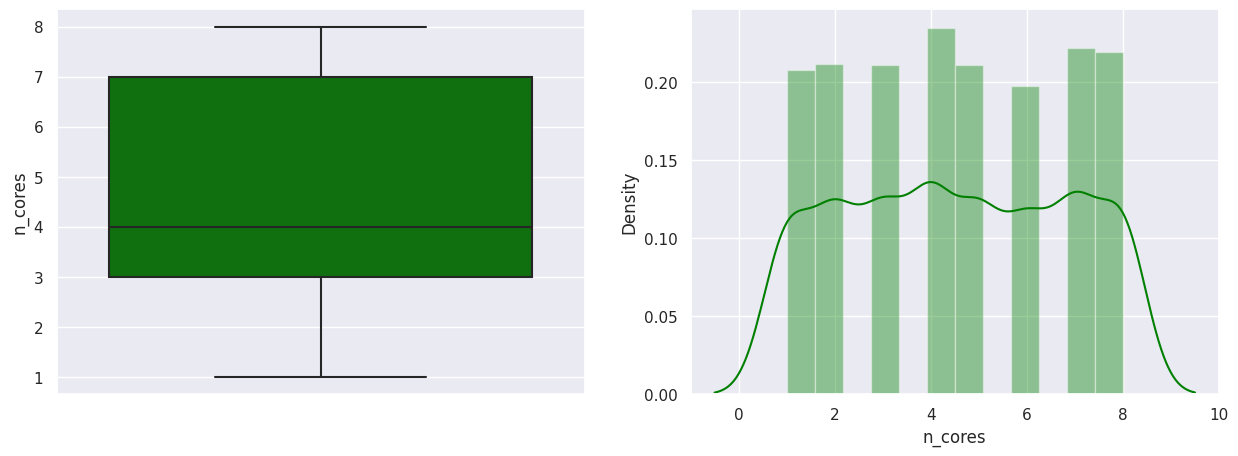

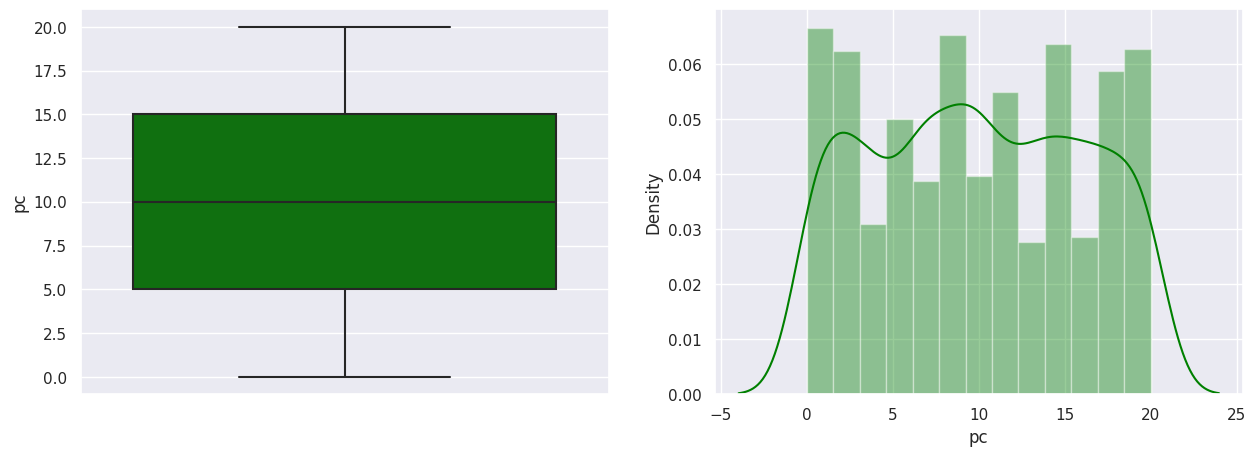

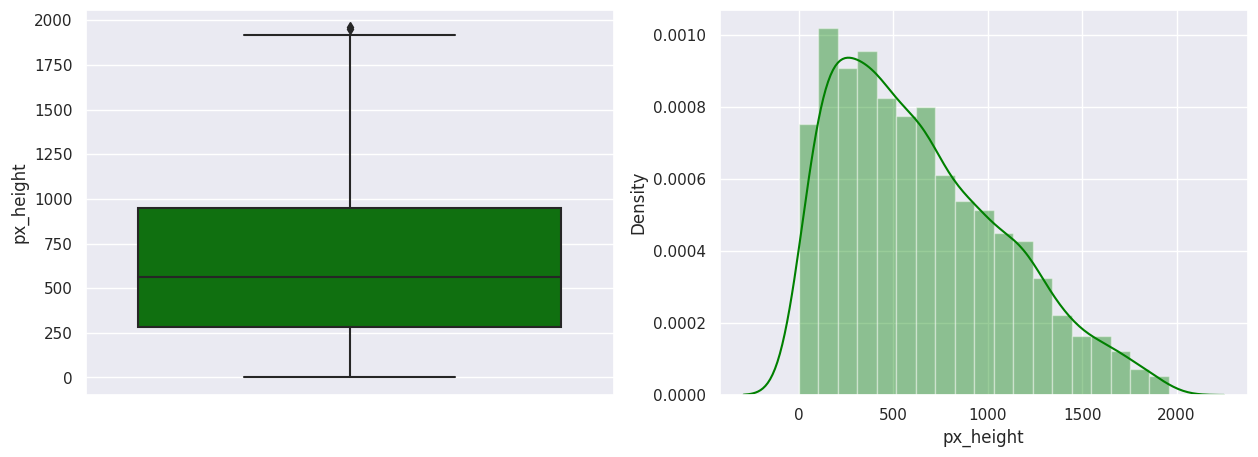

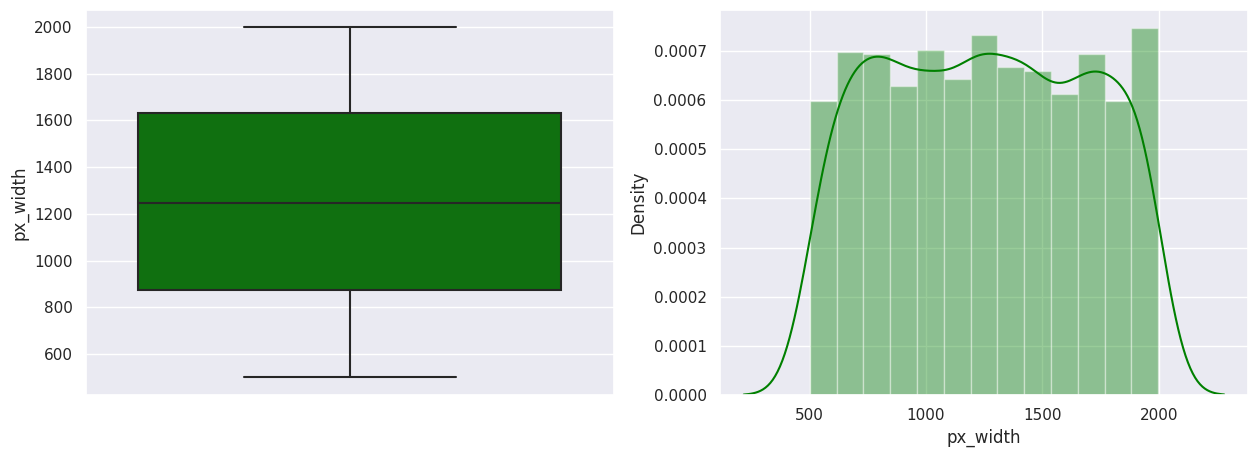

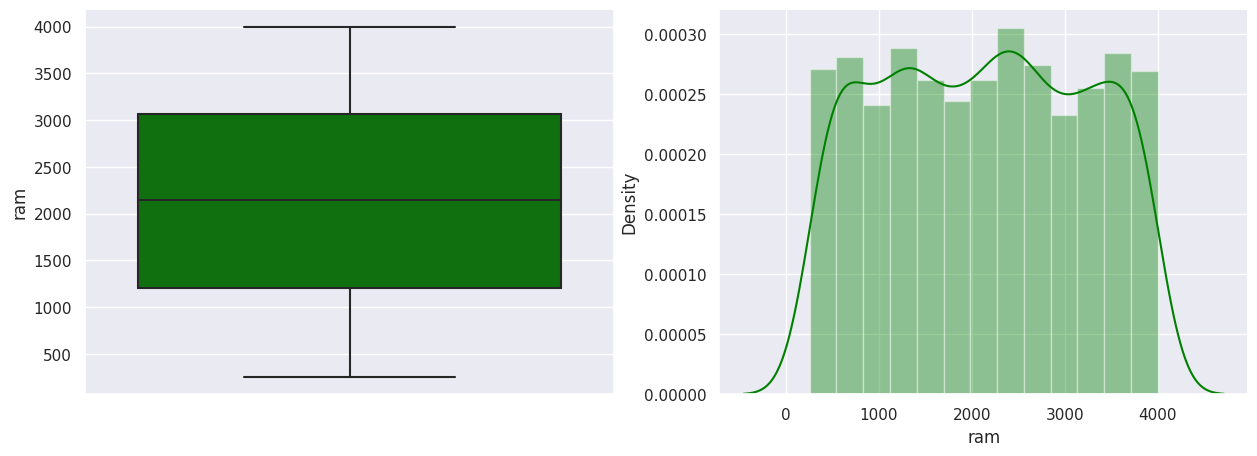

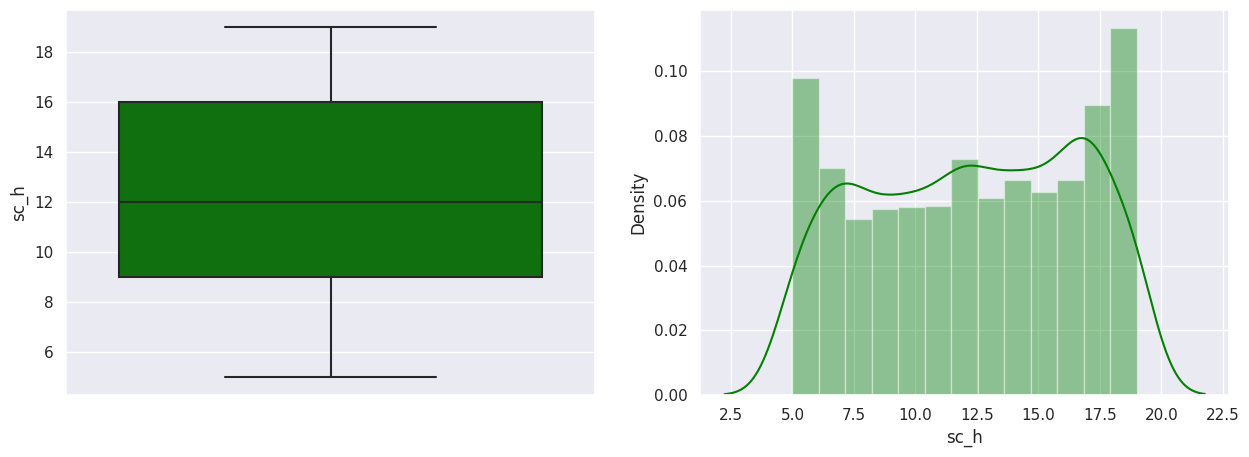

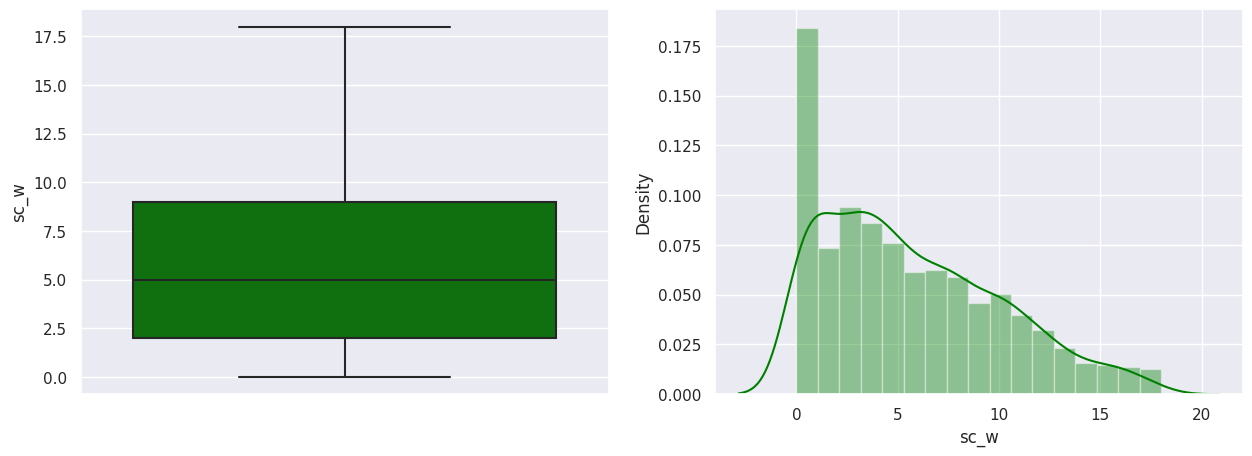

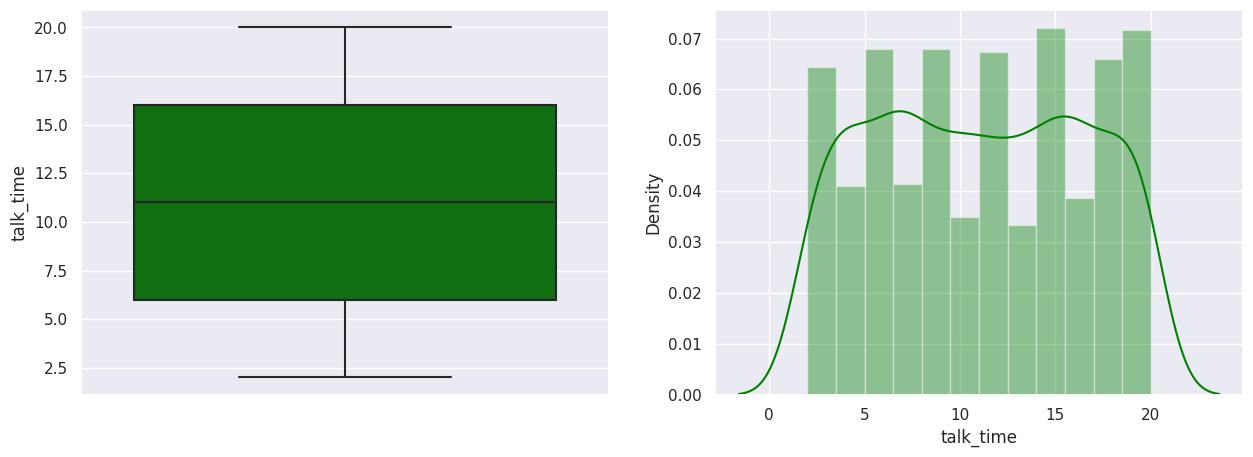

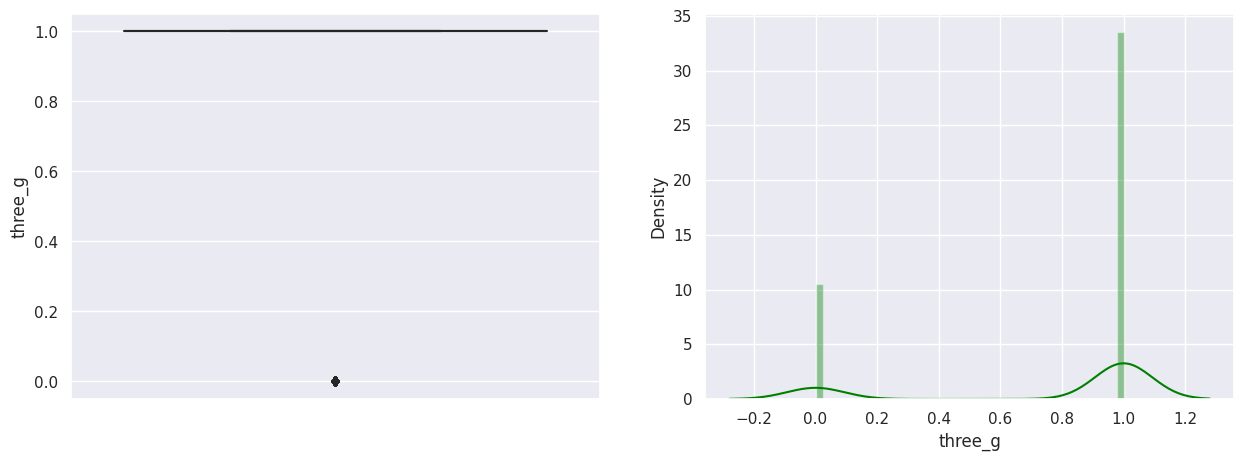

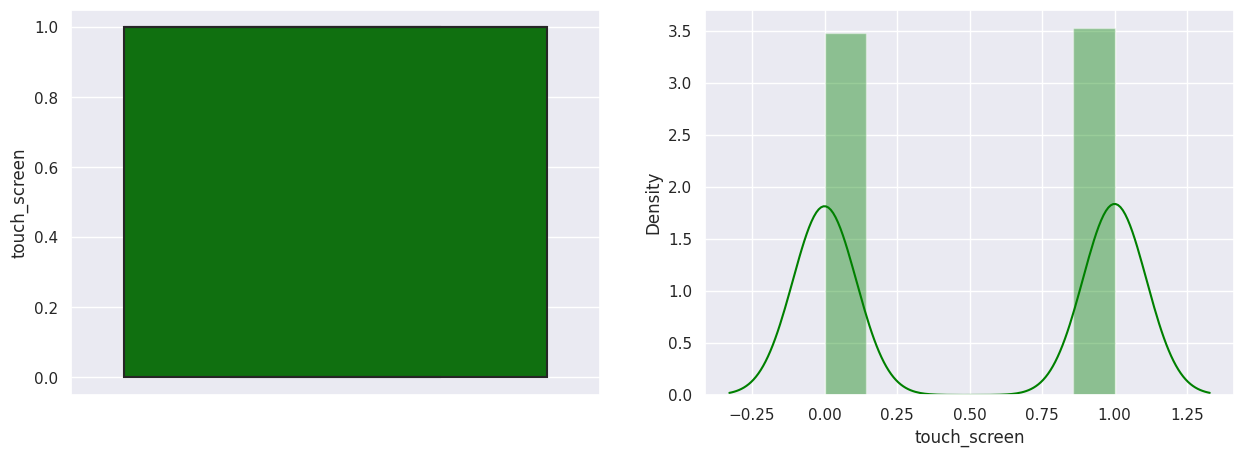

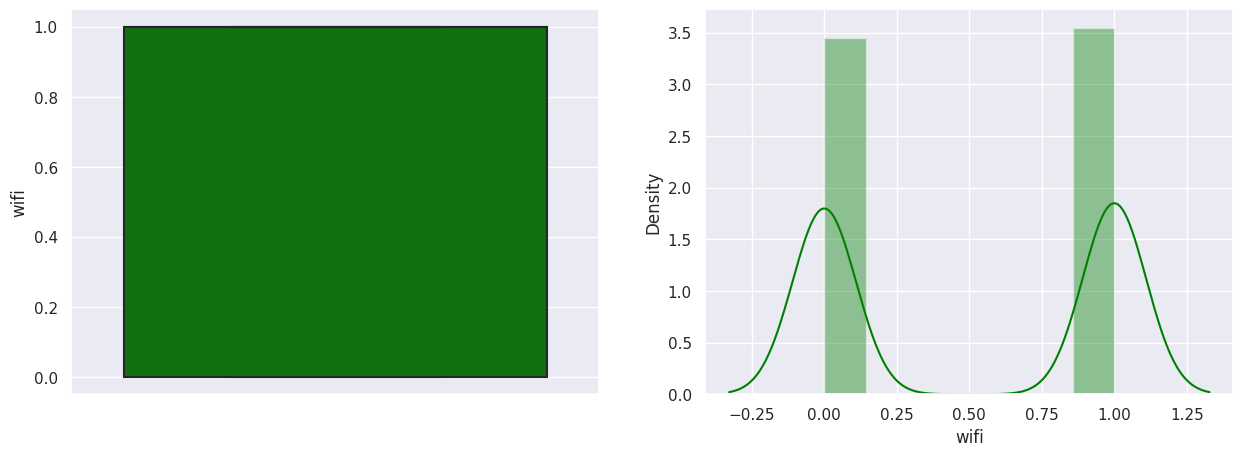

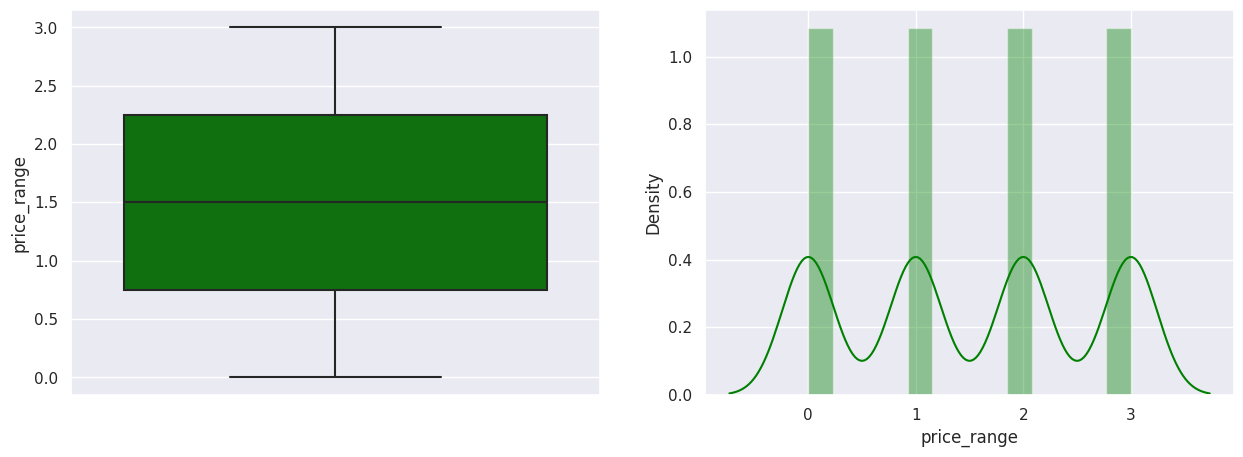

In [35]:
# Chart - 12 visualization code

for var in df:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')

    fig.set_xlabel(var)

    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Data is well distrubted.

fc and px_height has some outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

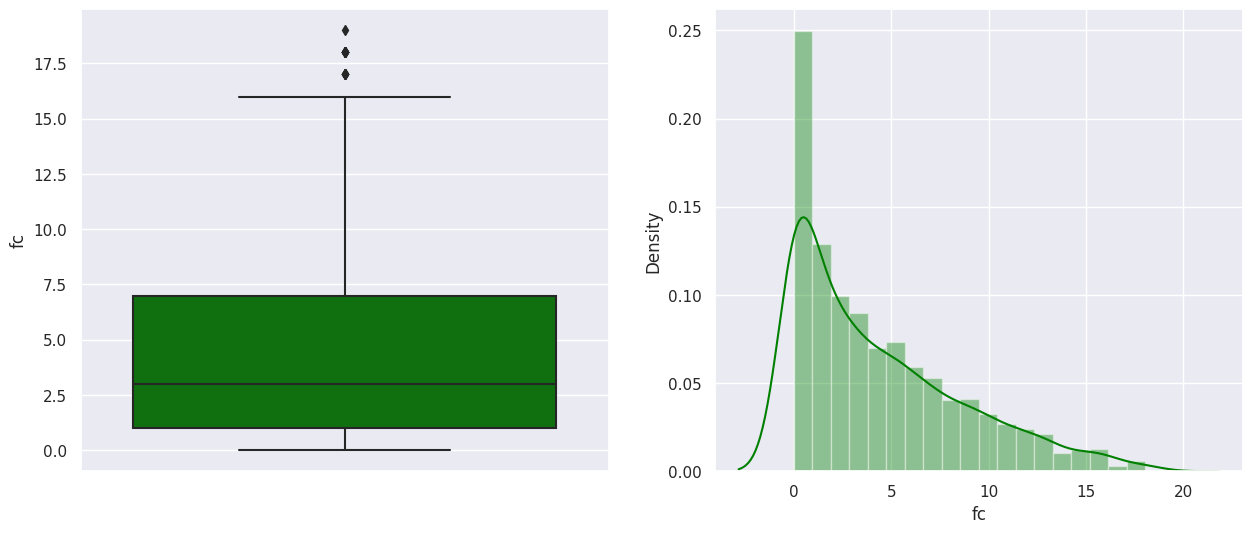

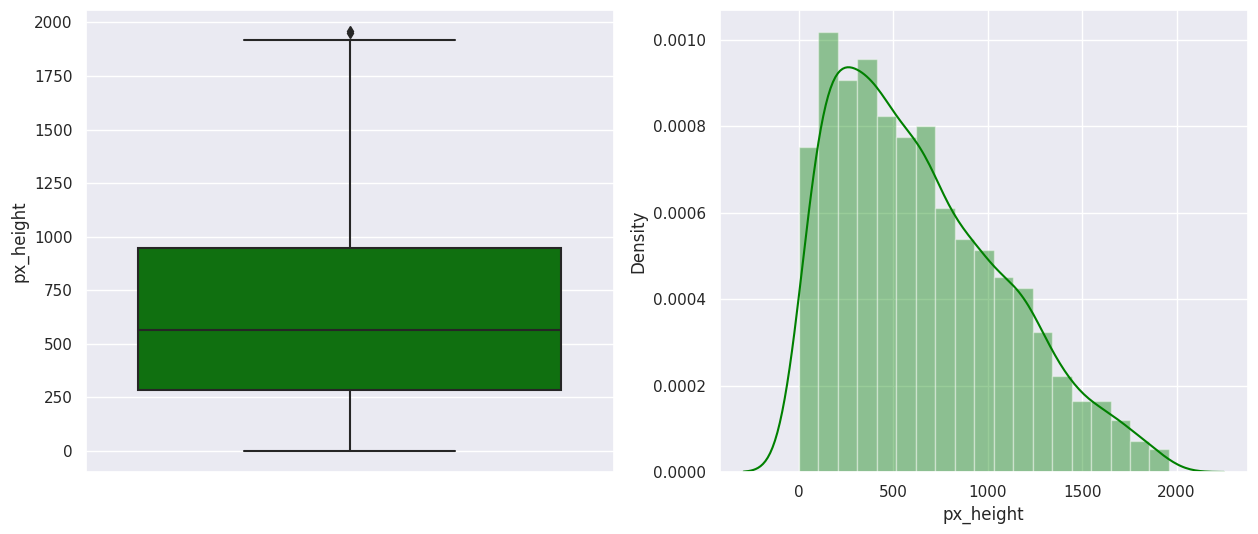

In [36]:
# Chart - 13 visualization code

for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')

    fig.set_xlabel(var)

    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

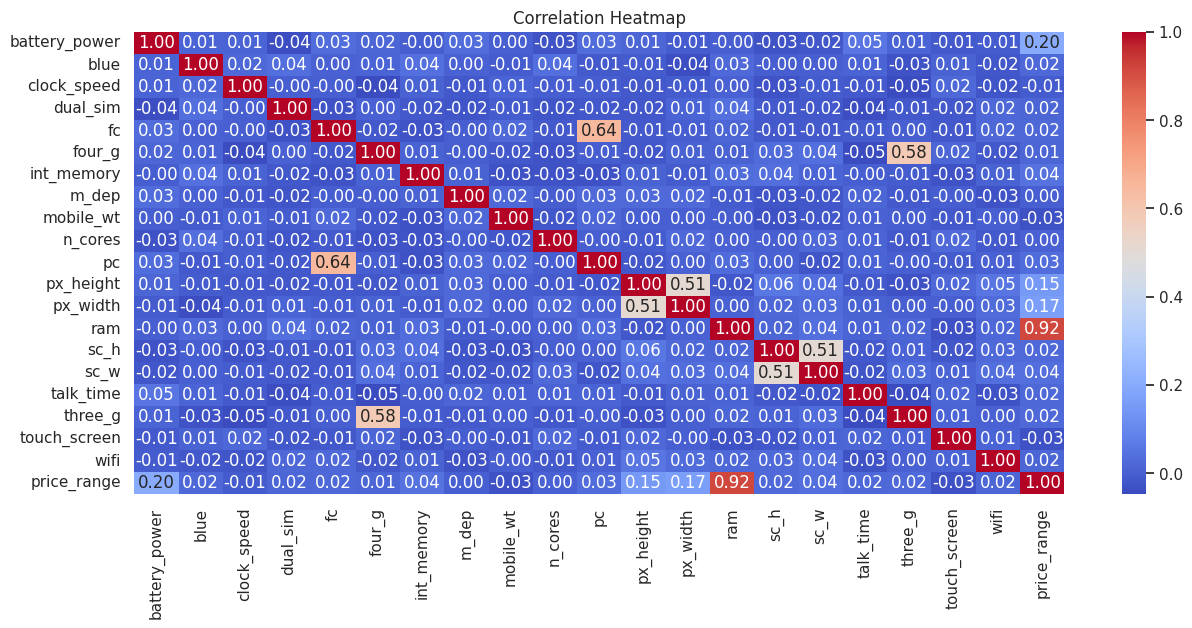

In [37]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

**Correlation Analysis:** Heatmaps are particularly useful for visualizing the correlation matrix of a dataset.

**Data Exploration:** Correlation heatmaps are often used during the exploratory data analysis (EDA) phase of a data science project.

**Visual Clarity:** Heatmaps use color to represent the strength and direction of correlations, making it easy to spot both positive and negative relationships.

**Comparison and Decision-Making:** Heatmaps allow you to quickly compare multiple variables' correlations at once.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

However, there are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

To address this collinearity, we could consider replacing the 'px_height' and 'px_width' features with a single feature representing the overall number of pixels on the screen. However, it is important to note that the 'fc' and 'pc' features should be kept separate, as they represent different aspects of the phone's camera capabilities (front camera megapixels vs. primary camera megapixels).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null hypothesis (H0): All categories of phones are distributed with equal price range.

Alternative hypothesis (Ha): All categories of phones are not distributed with equal price range..

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

feature_1_data = df['ram']
feature_2_data = df['price_range']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(feature_1_data, feature_2_data)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:  # Adjust the significance level as needed
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


T-statistic: 87.51521760975045
P-value: 0.0
There is a significant difference between the groups.


##### Which statistical test have you done to obtain P-Value?



Answer Here.

Statistical Test: Two-Sample T-Test

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis (H0): The proportion of times when wifi is not available is equal to or less than 0.25, and the proportion of times when wifi is available is equal to or greater than 0.75.

Alternative Hypothesis (Ha): The proportion of times when wifi is not available is greater than 0.25, or the proportion of times when wifi is available is less than 0.7

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

from statsmodels.stats.proportion import proportions_ztest

# these values with your actual data
not_available_count = 1014
available_count = 986
total_observations = not_available_count + available_count

# Specify the null hypothesis proportions
null_proportions = [0.25, 0.75]

# Perform a two-sided z-test for proportions
z_stat, p_value = proportions_ztest([not_available_count, available_count], [total_observations * prop for prop in null_proportions])

# Print the results
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Wi-Fi availability.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Wi-Fi availability.")


Z-statistic: inf
P-value: 0.0
Reject the null hypothesis: There is a significant difference in Wi-Fi availability.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

In the context of your hypothesis, i was testing whether the proportion of times when Wi-Fi is not available is less than or equal to 0.25 and whether the proportion of times when Wi-Fi is available is greater than or equal to 0.75. The chi-squared test for proportions helps determine if there is a statistically significant difference in these proportions.

So, The statistical test used to obtain the p-value in the provided code is the chi-squared test for proportions.

##### Why did you choose the specific statistical test?

Answer Here.

I chose the specific statistical test, the chi-squared test for proportions, because it is appropriate for comparing proportions or percentages in categorical data.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null hypothesis (H0): The proportion of devices with 4G sims is the same across all price ranges.

Alternative hypothesis (Ha): The proportion of devices with 4G sims is different across at least one pair of price ranges.

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(df['price_range'], df['four_g'])

# Perform the Chi-squared test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between 4G sims and price ranges.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between 4G sims and price ranges.")


Chi-squared statistic: 3.179879597375548
P-value: 0.36471408196943356
Fail to reject the null hypothesis: There is no significant association between 4G sims and price ranges.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
The chi-squared test calculates a chi-squared statistic and a p-value. The p-value is used to determine whether there is evidence to reject the null hypothesis. If the p-value is less than a chosen significance level (commonly 0.05), you may reject the null hypothesis and conclude that there is a significant association between the variables.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [74]:
# Handling Missing Values & Missing Value Imputation

print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

We checked the missing value but there is No missing value available.

### 2. Handling Outliers

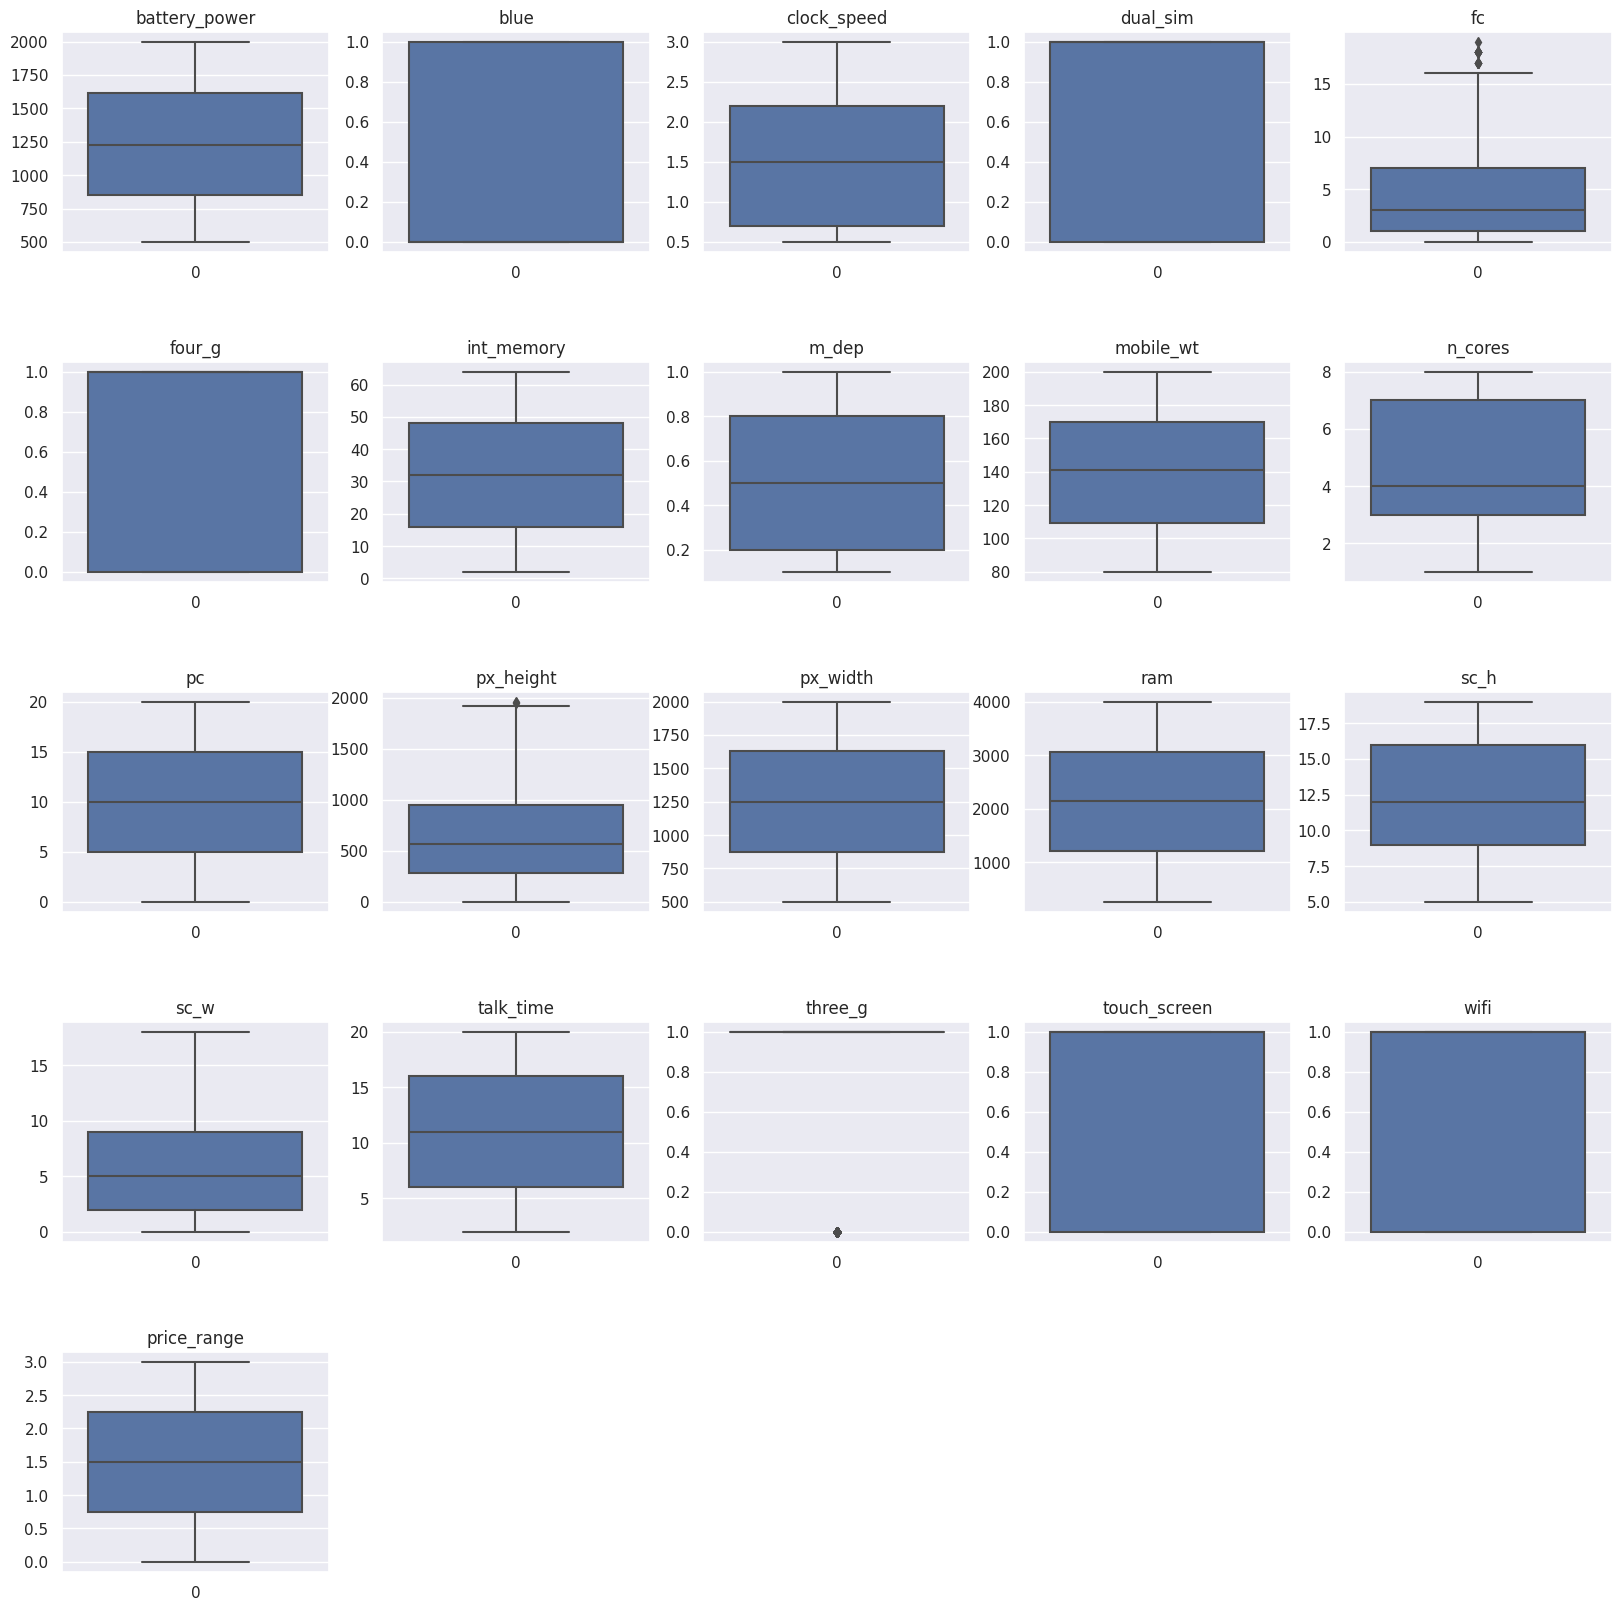

In [77]:
# Handling Outliers & Outlier treatments

# Set the figure size to 20x20
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(df[item])

  # Add the column name to the subplot title
  plt.title(item)

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

There are not many outliers and there is no need to experiment too much.

### 3. Categorical Encoding

In [81]:
# Encode your categorical columns
# Display the dataset before encoding
print("Dataset before encoding:")
df.head()

Dataset before encoding:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

Categorical encoding is not necessary since all values are integers or floats.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [86]:
# Manipulate Features to minimize feature correlation and create new features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Display correlation matrix before manipulation
print("Correlation matrix before manipulation:")
df.corr()

Correlation matrix before manipulation:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Feature_Sum,Feature_Product
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723,0.317253,0.015908
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573,0.009772,0.053501
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606,-0.000500,0.005103
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444,0.016052,0.051972
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998,0.023495,0.035606
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772,0.006927,0.050738
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435,0.037060,0.033065
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853,0.019607,0.044572
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302,0.023801,0.027292
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399,0.000688,0.028298


In [88]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display correlation matrix after feature scaling
print("\nCorrelation matrix after feature scaling:")
df_scaled.corr()


Correlation matrix after feature scaling:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Feature_Sum,Feature_Product
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723,0.317253,0.015908
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573,0.009772,0.053501
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606,-0.000500,0.005103
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444,0.016052,0.051972
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998,0.023495,0.035606
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772,0.006927,0.050738
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435,0.037060,0.033065
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853,0.019607,0.044572
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302,0.023801,0.027292
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399,0.000688,0.028298


In [89]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# Display correlation matrix after PCA
print("\nCorrelation matrix after PCA:")
print(df_pca.corr())



Correlation matrix after PCA:
               PC1           PC2           PC3           PC4           PC5  \
PC1   1.000000e+00 -1.015740e-16  3.089429e-17 -1.073792e-17  7.798682e-17   
PC2  -1.015740e-16  1.000000e+00  2.030370e-17 -1.334027e-16 -1.732602e-16   
PC3   3.089429e-17  2.030370e-17  1.000000e+00 -7.201187e-16  2.263414e-16   
PC4  -1.073792e-17 -1.334027e-16 -7.201187e-16  1.000000e+00 -7.965086e-16   
PC5   7.798682e-17 -1.732602e-16  2.263414e-16 -7.965086e-16  1.000000e+00   
PC6   4.710096e-17 -1.437415e-16 -4.152134e-17  9.885523e-17  1.246093e-16   
PC7   1.159174e-16  3.124446e-16  2.497702e-16 -1.258297e-16 -2.538439e-16   
PC8   1.078638e-17 -1.761793e-17  1.689946e-17  1.115422e-16  3.446778e-16   
PC9  -4.854912e-17 -1.742746e-16  6.144540e-17 -1.660659e-16  3.896634e-16   
PC10 -1.057556e-16  1.212087e-17  2.164211e-16 -2.854636e-16  1.849141e-16   
PC11 -1.520880e-16 -2.026584e-16  1.197240e-16 -1.010210e-17 -4.656184e-17   
PC12 -5.319572e-17  1.169660e-16 

In [90]:
# Create new features or interactions
df['Feature_Sum'] = df.sum(axis=1)
df['Feature_Product'] = df.product(axis=1)

# Display the dataset with new features
print("\nDataset with new features:")
df.head()


Dataset with new features:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Feature_Sum,Feature_Product
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,8813.6,0.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,13556.4,0.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,12748.8,0.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,13168.6,0.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,11795.6,0.0


##### What all feature selection methods have you used  and why?

Answer Here.

Feature scaling helps minimize the impact of different scales among features, while dimensionality reduction with PCA can reduce the number of features. Creating new features or interactions can capture additional information.

##### Which all features you found important and why?

Answer Here.

### 8. Data Splitting

In [92]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Feature_Sum,Feature_Product
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,8813.6,0.0


In [93]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

# Specify the features (X) and target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split the data into training and testing sets
# Choose the splitting ratio wisely based on your dataset size and model requirements
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1600, 22) (1600,)
Testing set shape: (400, 22) (400,)


In [94]:
# apply zscore for scaling
from scipy.stats import zscore
X=X.apply(zscore)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Feature_Sum,Feature_Product
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.052969,-0.031903
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,-0.052969,-0.031903
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,-0.052969,-0.031903
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,-0.052969,-0.031903
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.052969,-0.031903


##### What data splitting ratio have you used and why?

Answer Here.

 I used a common data splitting ratio of 80% for training and 20% for testing. While 80/20 is a common starting point, it's not a strict rule, and you may adjust the ratio based on the specific characteristics of your dataset and modeling requirements.

## ***7. ML Model Implementation***

### ML Model - 1

In [62]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [67]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [70]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [71]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***